In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from itertools import chain
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
data = pd.read_csv('C:/Users/1/Desktop/data_project/property_value_data.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop_duplicates()
data.columns

Index(['rooms', 'type', 'meters', 'district', 'price', 'price_per_meter',
       'terms_of_transaction', 'mortgage', 'floor 1', 'floor 2', 'living_area',
       'window_view', 'repair ', 'type_of_house', 'year_at_home', 'parking',
       'address', 'hospital_info', 'eat_info', 'school_info', 'average_time',
       'toilet', 'balcony', 'elevators', 'service lift'],
      dtype='object')

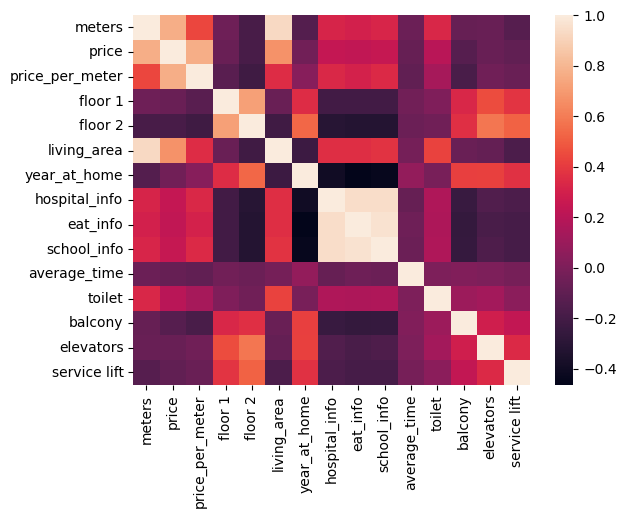

In [36]:
corr_map = sns.heatmap(data.select_dtypes(include =['float64', 'int64']).corr(), annot=False)

In [37]:
data.select_dtypes(include =['float64', 'int64']).corr()

,meters,price,price_per_meter,floor 1,floor 2,living_area,year_at_home,hospital_info,eat_info,school_info,average_time,toilet,balcony,elevators,service lift
meters,1.000000,0.766446,0.438715,-0.049878,-0.184638,0.930900,-0.140942,0.318819,0.297369,0.320691,-0.062954,0.327102,-0.079696,-0.071559,-0.136033
price,0.766446,1.000000,0.770280,-0.068243,-0.185789,0.672775,-0.037996,0.240443,0.231032,0.247053,-0.075430,0.203169,-0.132460,-0.074340,-0.092952
price_per_meter,0.438715,0.770280,1.000000,-0.125550,-0.219845,0.352191,0.037574,0.334463,0.307555,0.336954,-0.093947,0.140545,-0.182136,-0.045732,-0.065046
floor 1,-0.049878,-0.068243,-0.125550,1.000000,0.715319,-0.066294,0.350620,-0.207005,-0.208410,-0.212356,-0.038276,0.006481,0.327039,0.452695,0.377503
floor 2,-0.184638,-0.185789,-0.219845,0.715319,1.000000,-0.216930,0.531627,-0.312212,-0.325174,-0.322100,-0.063384,-0.045419,0.361478,0.580725,0.517680
living_area,0.930900,0.672775,0.352191,-0.066294,-0.216930,1.000000,-0.231905,0.358599,0.354654,0.372269,-0.024664,0.426978,-0.064104,-0.081150,-0.167296
year_at_home,-0.140942,-0.037996,0.037574,0.350620,0.531627,-0.231905,1.000000,-0.397338,-0.464027,-0.440162,0.075266,-0.013975,0.416454,0.417080,0.370613
hospital_info,0.318819,0.240443,0.334463,-0.207005,-0.312212,0.358599,-0.397338,1.000000,0.944011,0.946351,-0.079316,0.167550,-0.242877,-0.151830,-0.170577
eat_info,0.297369,0.231032,0.307555,-0.208410,-0.325174,0.354654,-0.464027,0.944011,1.000000,0.960103,-0.049551,0.160421,-0.258501,-0.179116,-0.193064
school_info,0.320691,0.247053,0.336954,-0.212356,-0.322100,0.372269,-0.440162,0.946351,0.960103,1.000000,-0.060408,0.167274,-0.256366,-0.162424,-0.190959


<Axes: xlabel='price', ylabel='Count'>

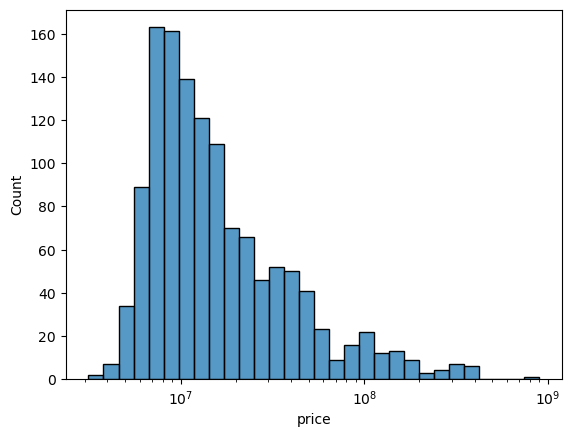

In [38]:
sns.histplot(data, x = 'price', bins=30, log_scale=True)

In [44]:
col_names = ['type','mortgage', 'window_view', 'repair ', 'type_of_house','parking','toilet', 'balcony', 'elevators', 'service lift']

for i in col_names:
    print('\t\t',len(data[i]))
    print(data[i].value_counts())
    print()

		 1280
type
квартира       1207
апартаменты      42
Name: count, dtype: int64

		 1280
terms_of_transaction
свободная продажа     1046
альтернатива           137
переуступка             79
свободная продажа       13
альтернатива             1
Name: count, dtype: int64

		 1280
mortgage
возможна    1054
Name: count, dtype: int64

		 1280
window_view
Во двор            465
На улицу и двор    354
На улицу           271
Name: count, dtype: int64

		 1280
repair 
Евроремонт       324
Косметический    306
Дизайнерский     301
Без ремонта      245
Name: count, dtype: int64

		 1280
type_of_house
Кирпичный              400
Монолитный             319
Панельный              202
Монолитно-кирпичный     90
Блочный                 17
Старый фонд              6
Name: count, dtype: int64

		 1280
parking
Наземная          330
Подземная         166
Открытая           25
Многоуровневая     24
Name: count, dtype: int64

		 1280
toilet
1.0    903
2.0    221
0.0    108
3.0     35
4.0      6
5.0      5
7.

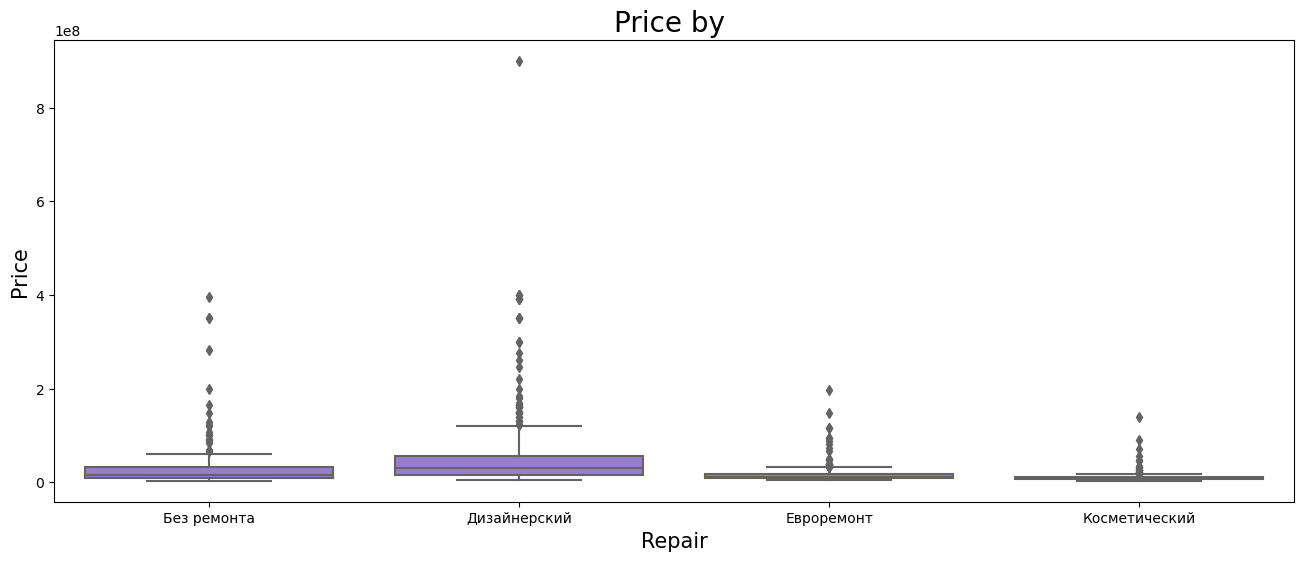

In [45]:
plt.figure(figsize=(16,6))

graph = sns.boxplot(x='repair ', y='price',
                 data=data,
                 color='mediumpurple')
graph.set_title("Price by ", fontsize=20)
graph.set_xlabel("Repair", fontsize=15)
graph.set_ylabel("Price", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels())

plt.show()

In [46]:
x = pd.read_csv('C:/Users/1/Python/x_clean.csv')
y = pd.read_csv('C:/Users/1/Python/y_clean.csv')
y = y.drop(['Unnamed: 0'], axis=1)
x = x.drop(['Unnamed: 0'], axis=1)

<h2>Conversion of cost from linear to logarithmic metric. Feature matrix extraction</h2>

In [47]:
y_log = np.log(y)
x_drop = x.copy()
x_drop = x_drop.drop(['rooms', 'floor 1', 'living_area', 
       'hospital_info', 'eat_info', 'school_info', 'average_time', 'elevators', 'service lift', 'type_апартаменты',
       'type_квартира', 'district_р-н Адмиралтейский',
       'district_р-н Василеостровский', 'district_р-н Выборгский',
       'district_р-н Калининский', 'district_р-н Кировский',
       'district_р-н Колпинский', 'district_р-н Красногвардейский',
       'district_р-н Красносельский', 'district_р-н Курортный',
       'district_р-н Московский', 'district_р-н Невский',
       'district_р-н Петроградский', 'district_р-н Петродворцовый',
       'district_р-н Приморский', 'district_р-н Пушкинский',
       'district_р-н Фрунзенский', 'district_р-н Центральный',
        'mortgage_No',
       'mortgage_возможна', 'window_view_Во двор', 'window_view_На улицу',
       'window_view_На улицу и двор', 
                     
       'parking_No','terms_of_transaction_альтернатива', 'terms_of_transaction_переуступка','terms_of_transaction_свободная продажа',
       'parking_Многоуровневая', 'parking_Наземная', 'parking_Открытая',
       'parking_Подземная'], axis=1)
x_drop.columns

Index(['meters', 'floor 2', 'year_at_home', 'toilet', 'balcony',
       'repair _Без ремонта', 'repair _Дизайнерский', 'repair _Евроремонт',
       'repair _Косметический', 'type_of_house_Блочный',
       'type_of_house_Кирпичный', 'type_of_house_Монолитно-кирпичный',
       'type_of_house_Монолитный', 'type_of_house_Панельный',
       'type_of_house_Старый фонд'],
      dtype='object')

<h3>Creating a linear model. Polynomial of the second degree</h3>

In [48]:
polynom_2= PolynomialFeatures(2, include_bias=False)
x_poly_2= polynom_2.fit_transform(x_drop) 

#random_state=20 178.9
'''Index(['meters', 'floor 2', 'year_at_home', 'toilet', 'balcony',
       'repair _Без ремонта', 'repair _Дизайнерский', 'repair _Евроремонт',
       'repair _Косметический', 'type_of_house_Блочный',
       'type_of_house_Кирпичный', 'type_of_house_Монолитно-кирпичный',
       'type_of_house_Монолитный', 'type_of_house_Панельный',
       'type_of_house_Старый фонд'],
      dtype='object')
      test_size=0.25, random_state=65
      '''
X_train, X_test, y_train, y_test = train_test_split(x_poly_2, y_log, test_size=0.25, random_state=65)

model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

tmse = mean_squared_error(y_test, y_test_pred) + mean_squared_error(y_train, y_train_pred)
sse = np.sum((y_test_pred - y_test )**2) + np.sum((y_train_pred - y_train )**2)

print('R^2 for training data', model.score(X_train,y_train ))
print('R^2 for test data',model.score(X_test,y_test ))
print('Intercept', model.intercept_)
print("MSE: {}".format(tmse))
print("SSE: {}".format(sse))

R^2 for training data 0.8414039560205852
R^2 for test data 0.8226385956969533
Intercept [-3.36233909e+12]
MSE: 0.23706899993078798
SSE: price    153.607673
dtype: float64


<h3>Residue distribution</h3>

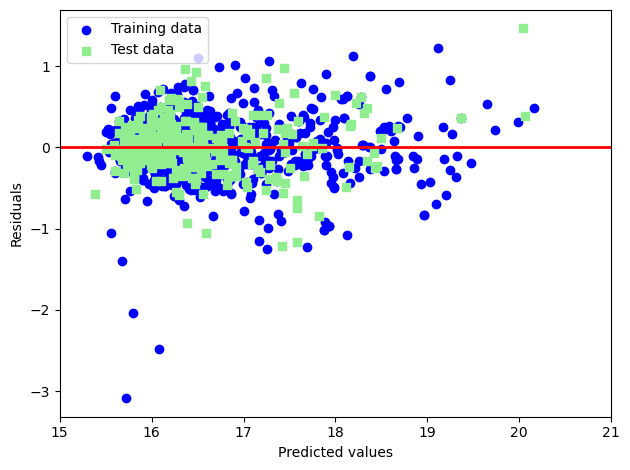

In [49]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=10, xmax=30, lw=2, color='red')
plt.xlim([15, 21])
plt.tight_layout()

In [50]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
result = model.fit()

print('BIC:', result.bic)
print('R^2 adj:', result.rsquared_adj)
print('R^2:', result.rsquared)

BIC: 1268.5843126356017
R^2 adj: 0.827886065093321
R^2: 0.84250295977754
